## 1) 
#### Calculate and plot Fn/Fn-1 with n using memorization method

In [1]:
#memorization method
def fib3(n, table):
    if n == 0 or n==1:
        table[n]=n
    if table[n] is None:
        table[n] = fib3(n-2,table)+fib3(n-1,table)
    return table[n]

In [2]:
import numpy as np
g_ratio = [] #list of ratio values
x = np.arange(0,41) #list of n values
for i in range(len(x)): 
    table = [None]*(x.shape[0])
    g_ratio.append(fib3(x[i],table)/fib3(x[i-1],table)) #calculate Fn/Fn-1 for values of n 

/Users/b_eebs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in long_scalars
  


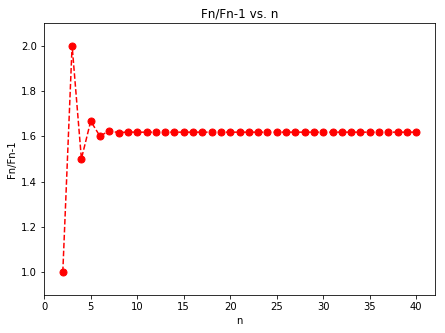

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(7,5))
plt.title('Fn/Fn-1 vs. n')
plt.xlabel('n')
plt.ylabel('Fn/Fn-1')
plt.axis([min(x), max(x)+2, 0.9, 2.1]) #setting axis size
plt.plot(x,g_ratio,'--ro',markersize=7)
plt.show()

## 2) 
#### a) Use the iteration method, tabulation method,  and matrix method to calculate the time spent for different n (e.g. 1, 10, 100, 1000, 10000, ...uniform in the log space). 
#### b) For each method, output the time and n into a filec) Read from the file and plot log(time) (y-axis) vs. log(n) (x-axis) for different methods

In [4]:
def fib(n,x): #function containing recursion, tabulation, and matrix methods
    """
    x is a function parameter that decides which method to use
    """
    #recursion
    if x == 0:
        if n == 0:
            return 0
        elif n == 1: 
            return 1
        else:
            return(fib(n-2,x) + fib(n-1,x))
    
    #tabulation
    elif x == 1: #
        table=[0]*(n+1)
        table[1] = 1
        for i in range(2,n+1):
            table[i] = table[i-2]+table[i-1]
        return table[n]
    
    #matrix
    else:
        arr= [[1,1],[1,0]]
        f=arrpow(arr,n-1)[0][0]
        return f

#function called by matrix method
def arrpow(arr, n):
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]],
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2: #if == 1
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

#function to write to files
def write_to_file(n,time,method): 
#add column titles maybe
    import csv
    with open(method+'.csv','a') as f:
        write = csv.writer(f, delimiter=',') #sets delimiter to ,
        write.writerow([str(n),str(time)]) #writes n and time to row
        
#function to read from files and return lists of results
def read_from_file(file):
    import csv
    n = []
    times = []
    with open(file, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            n.append(float(row[0]))
            times.append(float(row[1]))
        return(n,times)

In [5]:
#part a 
#just add all of these calculations to the functions
import time
n = np.logspace(1,10,10,True,10,int) #array of n values from 10 to .... 10**10 , uniform in log space 
n = np.insert(n,0,1) #add 1 to n

method = ['recursion','tabulation','matrix'] #list of methods used when calling write_to_file

for i in range(len(method)):
    if i == 0: #loops over 1 and 10 for recursion method
        loop = range(len(n)-9)
    else: #loops over 1 - 100,000 for tabulation and matrix method
        loop = range(len(n)-5)
    for j in loop:
        if i == 2 and n[j] == 1: #filters out the 1 when calculating matrix method, sets time = 0 @ n=1
            write_to_file(loop[j],0,method[i])
        else: #calculates the time it takes for fibonacci calculations for all methods
            ti = time.time()
            fib(n[j],i) #calculates fibonacci, i tells function which method to use
            tf = time.time()
            write_to_file(n[j],tf-ti,method[i]) #writes n, time, and method to write_to_file

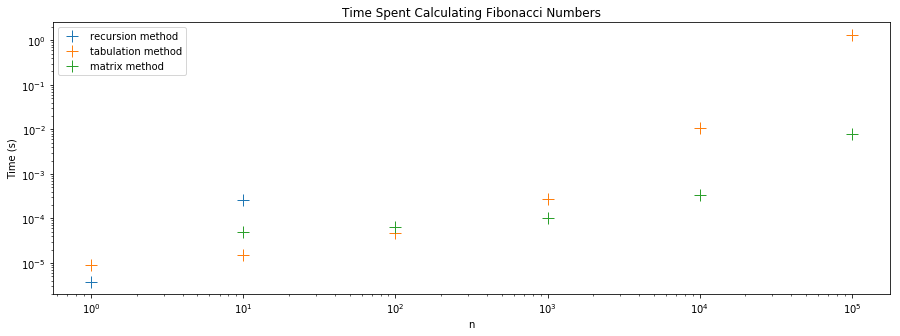

In [6]:
plt.figure(figsize=(15,5))
#logs scales 
plt.title('Time Spent Calculating Fibonacci Numbers')
#logs scales 
plt.xlabel('n')
plt.xscale('log')
plt.ylabel('Time (s)')
plt.yscale('log')
#for loop to read from each file and plot results
for i in method:
    x,y = read_from_file(i+'.csv')
    plt.plot(x,y,'+',label=(i+' method'),markersize=12)
plt.legend(loc='upper left')
plt.show()
